Key point preserving augmentations using `albumentations`:
    1. vertical flip
    2. horizontal flip
    3. random horizontal or vertical flip
    4. random crop
    5. random rotation
    6. center crop
    7. random sized crop
    8. chainning multiple transformations

In [1]:
from matplotlib import pyplot as plt
from skimage import io
import numpy as np
import cv2
import os
import albumentations as albu # image augmentation library 

In [15]:
dog = cv2.imread("images/dog.jpg",3)

dog =cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

In [6]:
points = [(120, 1750), (470, 1560), (800, 1460), (1250, 1200), (1540, 1150 ), (1840, 1200), 
(2250, 1180 ),  (2540, 1140), (3000, 1520), (3560, 1700), (820, 1750), (1300, 1700), 
(2350, 1720), (2800, 1750), (270, 2300), (1200, 2300), (1750, 2000), (2300, 2300), (3400, 2300)]

In [8]:
def visualise_points(dog,points,diameter=24):
    img = dog.copy()
    
    for (x,y) in points:
        cv2.circle(img,(int(x),int(y)),diameter, (0,255,0),-1)
    plt.figure(figsize=(12,10))
    plt.imshow(img)

In [18]:
def transformer(transformations):
    return albu.Compose(transformations,
                       p=1, # apply the transformations with probability of 1
                       keypoint_params={'format':'xy'})(image=dog, keypoints=points)

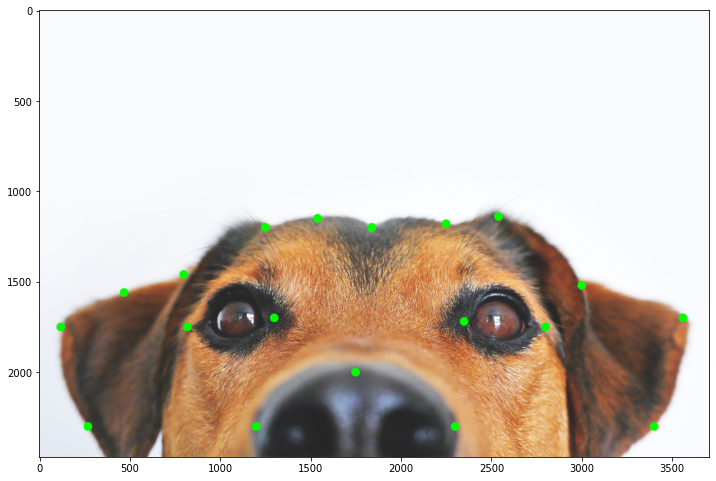

In [16]:
visualise_points(dog,points)

### 1. Vertical flip

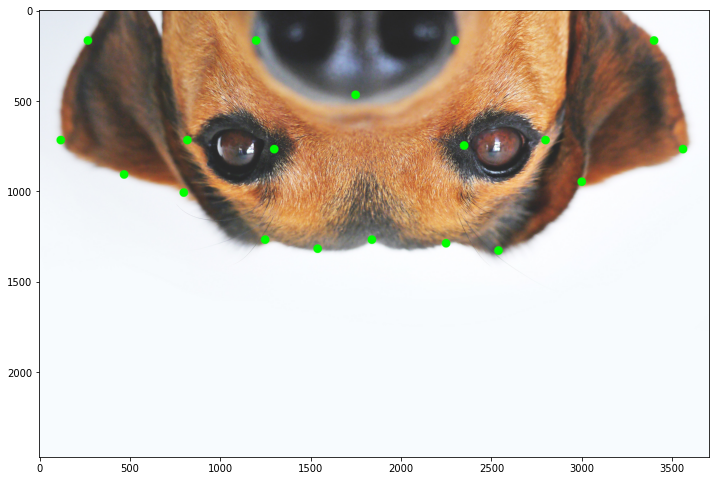

In [26]:
transformed_img = transformer([albu.VerticalFlip(p=1)]) # probability of transformation = 1

key_points = transformed_img["keypoints"]
flipped_img = transformed_img['image']

visualise_points(flipped_img,key_points)

### 2. Horizontal flip

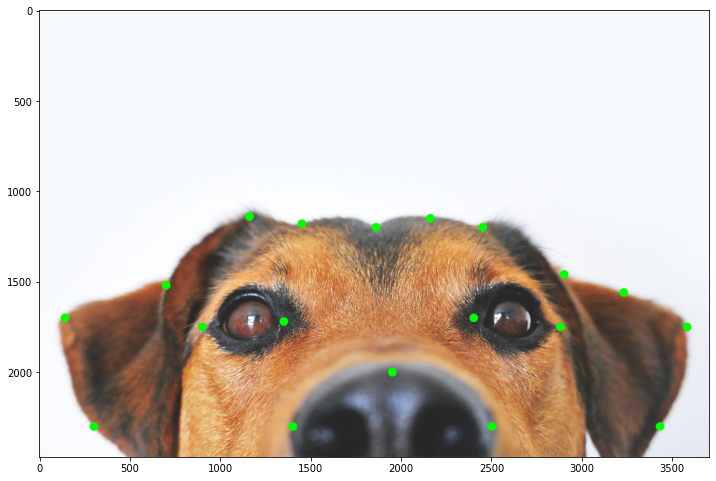

In [27]:
transformed_img = transformer([albu.HorizontalFlip(p=1)]) # probability of transformation = 1

key_points = transformed_img["keypoints"]
hori_flipped_img = transformed_img['image']

visualise_points(hori_flipped_img,key_points)

### 3. random horizontal or vertical flip

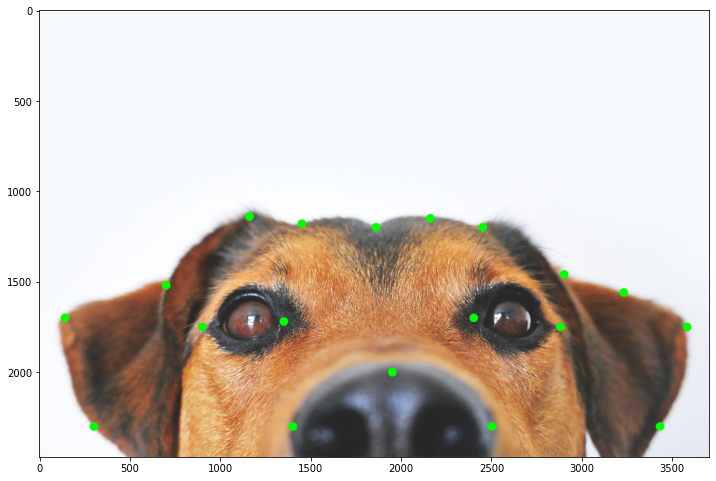

In [28]:
transformed_img = transformer([albu.Flip(p=1)]) # probability of transformation = 1

key_points = transformed_img["keypoints"]
random_flipped_img = transformed_img['image']

visualise_points(random_flipped_img,key_points)

### 4. random crop

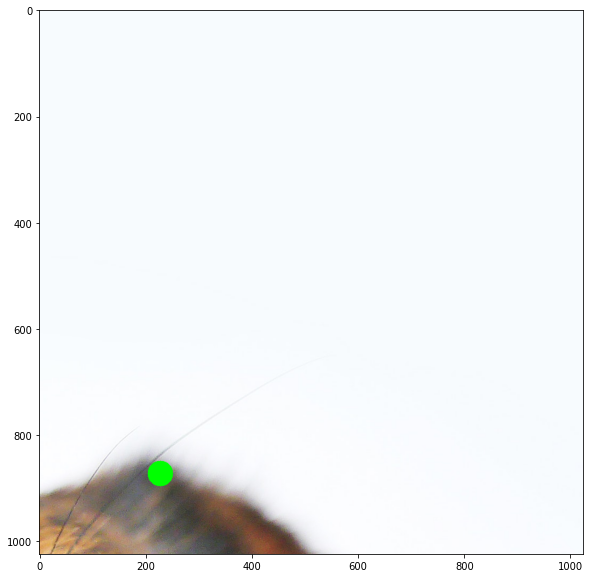

In [29]:
transformed_img = transformer([albu.RandomCrop(width=1024,
                                               height=1024,
                                               p=1)]) 

key_points = transformed_img["keypoints"]
cropped_img = transformed_img['image']

visualise_points(cropped_img,key_points)

### 5. random rotation

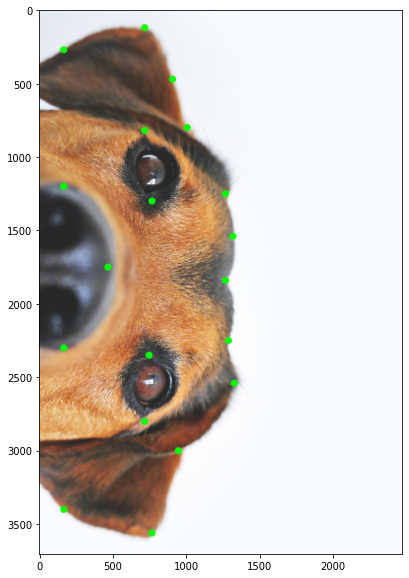

In [31]:
transformed_img = transformer([albu.RandomRotate90(p=1)]) # 90 degrees rotation

key_points = transformed_img["keypoints"]
rotated_img = transformed_img['image']

visualise_points(rotated_img,key_points)

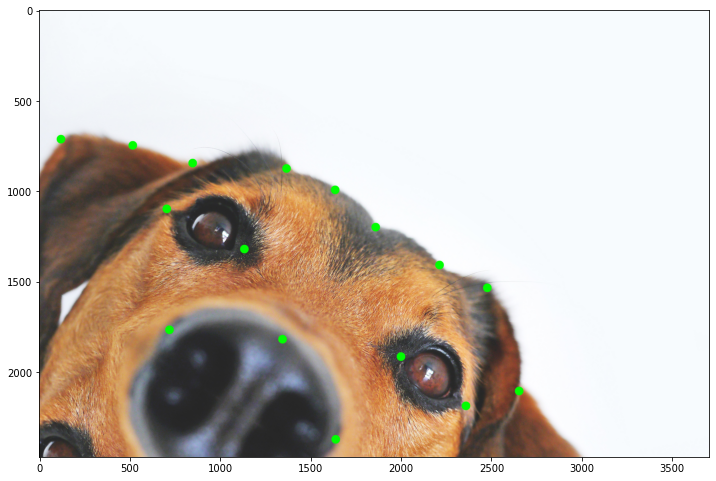

In [32]:
transformed_img = transformer([albu.Rotate(p=1)]) # random rotation to any degree

key_points = transformed_img["keypoints"]
rotated_img2 = transformed_img['image']

visualise_points(rotated_img2,key_points)

### 6. center crop

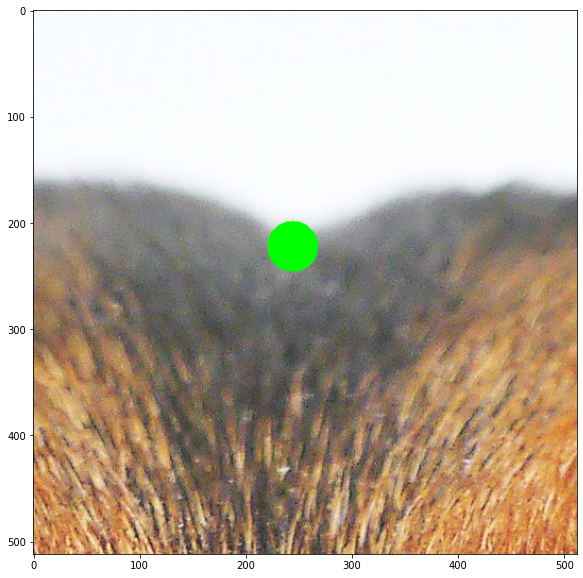

In [34]:
transformed_img = transformer([albu.CenterCrop(height=512,
                                               width=512,
                                               p=1)]) # random rotation to any degree

key_points = transformed_img["keypoints"]
center_crop_img = transformed_img['image']

visualise_points(center_crop_img,key_points)

### 7. random sized crop

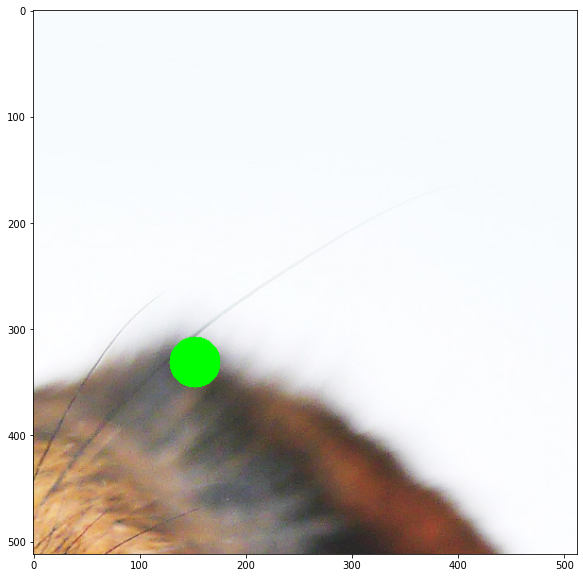

In [36]:
transformed_img = transformer([albu.RandomSizedCrop(min_max_height=(256,1024),
                                                    height=512,
                                               width=512,
                                               p=1)]) # random rotation to any degree

key_points = transformed_img["keypoints"]
random_sized_crop_img = transformed_img['image']

visualise_points(random_sized_crop_img ,key_points)

### 8. chainning multiple transformations

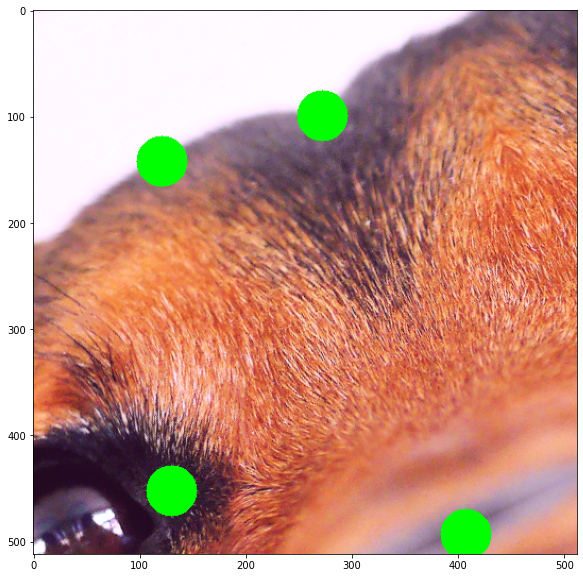

In [39]:
transformed_img = transformer([albu.RandomSizedCrop(min_max_height=(256, 1025), height=512, width=512, p=0.8),
                                   albu.ShiftScaleRotate(p=1),
                                  albu.OneOf([albu.HueSaturationValue(p=0.5), 
                                              albu.RGBShift(p=0.7)], p=1), 
                                           albu.RandomBrightnessContrast(p=0.5)])


key_points = transformed_img["keypoints"]
chained_img = transformed_img['image']

visualise_points(chained_img ,key_points)